In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from pylab import rcParams
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
# Loading the CSV with pandas
data = pd.read_csv('Telco-Customer-Churn.csv')

In [7]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

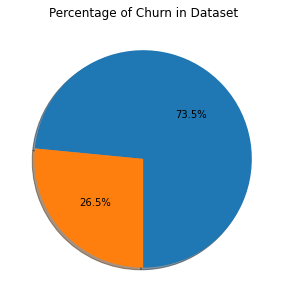

In [23]:
# Data to plot
sizes = data['Churn'].value_counts(sort = True)
colors = ["grey","purple"] 
rcParams['figure.figsize'] = 5,5# Plot
plt.pie(sizes, autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.show()

###Data Preparation and Feature Engineering

In [24]:
data.drop(['customerID'], axis=1, inplace=True)

In [43]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [27]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [49]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges']).astype(int)
#data['TotalCharges'].astype(str).astype(float)

ValueError: ignored

In [48]:
print (data[pd.to_numeric(data['TotalCharges'], errors='coerce').isnull()])

      gender  SeniorCitizen Partner  ... MonthlyCharges  TotalCharges Churn
488   Female              0     Yes  ...          52.55                  No
753     Male              0      No  ...          20.25                  No
936   Female              0     Yes  ...          80.85                  No
1082    Male              0     Yes  ...          25.75                  No
1340  Female              0     Yes  ...          56.05                  No
3331    Male              0     Yes  ...          19.85                  No
3826    Male              0     Yes  ...          25.35                  No
4380  Female              0     Yes  ...          20.00                  No
5218    Male              0     Yes  ...          19.70                  No
6670  Female              0     Yes  ...          73.35                  No
6754    Male              0      No  ...          61.90                  No

[11 rows x 20 columns]


In [47]:
data['TotalCharges'] = data['TotalCharges'].dropna()